# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.


In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,"✅ Trip Verified | BA First, it's not even the..."
1,✅ Trip Verified | The worst business class ex...
2,Not Verified | Quite possibly the worst busin...
3,Not Verified | I will never be flying with BA...
4,✅ Trip Verified | On the my trip to Mexico Ci...


In [4]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [5]:
df.to_csv("data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.


In [6]:
df = pd.read_csv("data/BA_reviews.csv", index_col=0)

In [7]:
df

,reviews
0,"✅ Trip Verified | BA First, it's not even the..."
1,✅ Trip Verified | The worst business class ex...
2,Not Verified | Quite possibly the worst busin...
3,Not Verified | I will never be flying with BA...
4,✅ Trip Verified | On the my trip to Mexico Ci...
...,...
995,✅ Trip Verified | Dallas to London Heathrow i...
996,✅ Trip Verified | Tenerife to Heathrow. Effec...
997,✅ Trip Verified | Heathrow to Larnaca - depart...
998,✅ Trip Verified | Los Angeles to London. A ve...


In [8]:
df.isnull().value_counts()

reviews
False      1000
Name: count, dtype: int64

In [9]:
df["verified"] = df["reviews"].str.contains("Trip Verified")

In [10]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

stop_words = set(stopwords.words('english'))
special_chars = re.compile(r'[^\w\s]', re.I|re.A)
lem = WordNetLemmatizer()

reviews_data = df["reviews"].str.replace("Trip Verified", " ") # Remove the "Trip Verified" text
reviews_data = reviews_data.str.replace("Not Verified", " ") #  Remove the "Not Verified" text

corpus = []

for text in reviews_data:
    text = special_chars.sub('', text).lower()
    text = re.sub('https?://\S+|www\.\S+', '', text)
    words = nltk.word_tokenize(text)

    words = [word for word in words if word not in stop_words]

    words = [lem.lemmatize(word) for word in words]
    
    text = " ".join(words)
    corpus.append(text)

In [12]:
# df  = df.drop('corpus', axis=1)

In [13]:
df["corpus"] = corpus

In [14]:
df

,reviews,verified,corpus
0,"✅ Trip Verified | BA First, it's not even the...",True,ba first even best business class sky cabin lo...
1,✅ Trip Verified | The worst business class ex...,True,worst business class experience ground crew si...
2,Not Verified | Quite possibly the worst busin...,False,quite possibly worst business class ever flown...
3,Not Verified | I will never be flying with BA...,False,never flying ba first last flying singapore tr...
4,✅ Trip Verified | On the my trip to Mexico Ci...,True,trip mexico city opportunity experience ba lon...
...,...,...,...
995,✅ Trip Verified | Dallas to London Heathrow i...,True,dallas london heathrow first class worst exper...
996,✅ Trip Verified | Tenerife to Heathrow. Effec...,True,tenerife heathrow effectively budget airline m...
997,✅ Trip Verified | Heathrow to Larnaca - depart...,True,heathrow larnaca departed time flight nearly f...
998,✅ Trip Verified | Los Angeles to London. A ve...,True,los angeles london enjoyable comfortable fligh...


In [15]:
df.shape

(1000, 3)

In [16]:
df["verified"].value_counts()


verified
True     767
False    233
Name: count, dtype: int64

In [18]:
from collections import Counter

# Split each sentence in 'corpus' into words and count the frequency of each word
word_freq = Counter(word for sentence in corpus for word in sentence.split())

# Print the frequency of each word in descending order
for word, freq in word_freq.most_common():
    print(f'{word}: {freq}')

flight: 2179
ba: 1245
seat: 854
service: 772
time: 636
hour: 577
london: 531
airline: 461
crew: 452
class: 445
food: 444
british: 436
one: 435
airway: 433
good: 427
business: 405
u: 398
staff: 396
cabin: 383
would: 377
get: 371
customer: 356
day: 318
heathrow: 311
passenger: 303
back: 298
even: 274
bag: 273
airport: 268
told: 264
could: 261
check: 261
first: 259
boarding: 257
experience: 254
economy: 252
plane: 247
meal: 232
minute: 227
drink: 226
club: 208
lounge: 207
fly: 205
return: 205
luggage: 202
cancelled: 199
got: 192
new: 192
2: 189
never: 188
booked: 186
aircraft: 178
call: 178
still: 176
another: 175
due: 174
two: 172
delayed: 169
also: 169
ticket: 168
really: 165
make: 165
arrived: 165
like: 164
made: 159
gate: 159
well: 157
3: 156
late: 154
people: 151
refund: 150
next: 149
offered: 147
much: 145
way: 144
full: 144
great: 143
year: 143
travel: 141
took: 141
said: 140
delay: 140
long: 139
given: 139
baggage: 139
board: 138
flying: 138
however: 137
trip: 134
premium: 133
ask

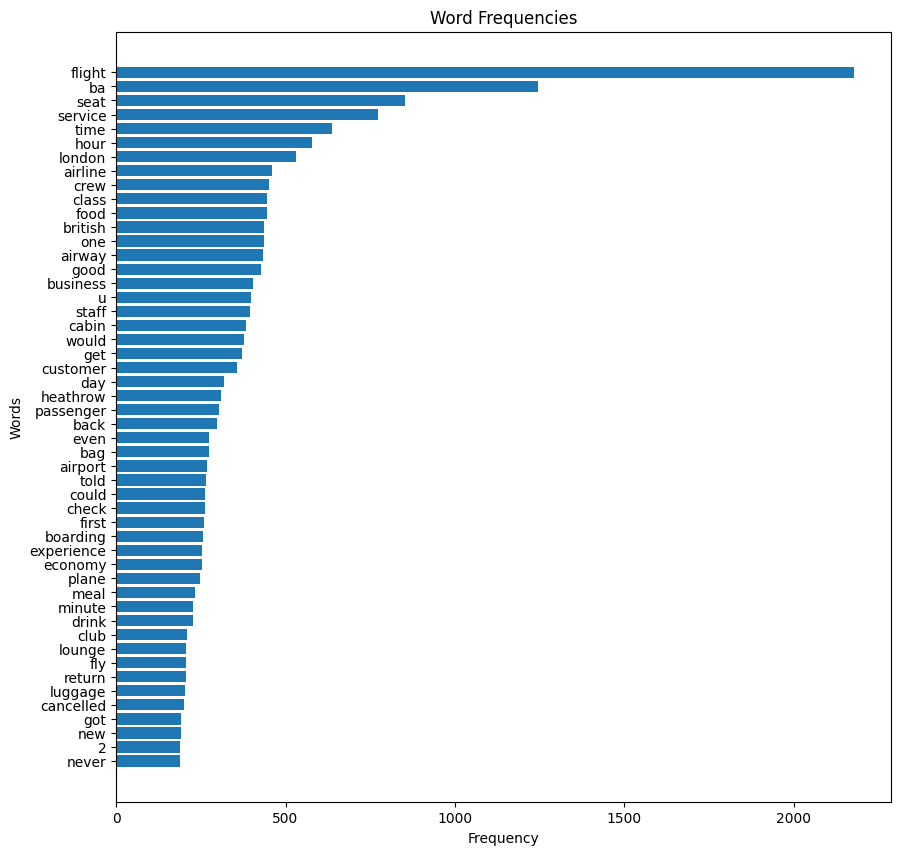

In [19]:
# Get the 10 most common words
common_words = word_freq.most_common(50)

# Unzip the word-frequency pairs into two lists
words, frequencies = zip(*common_words)

# Create a horizontal bar chart
plt.figure(figsize=(10, 10))
plt.barh(words, frequencies)
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Word Frequencies')
plt.gca().invert_yaxis()  # Invert the y-axis to show the highest frequency at the top
plt.show()

(-0.5, 399.5, 399.5, -0.5)

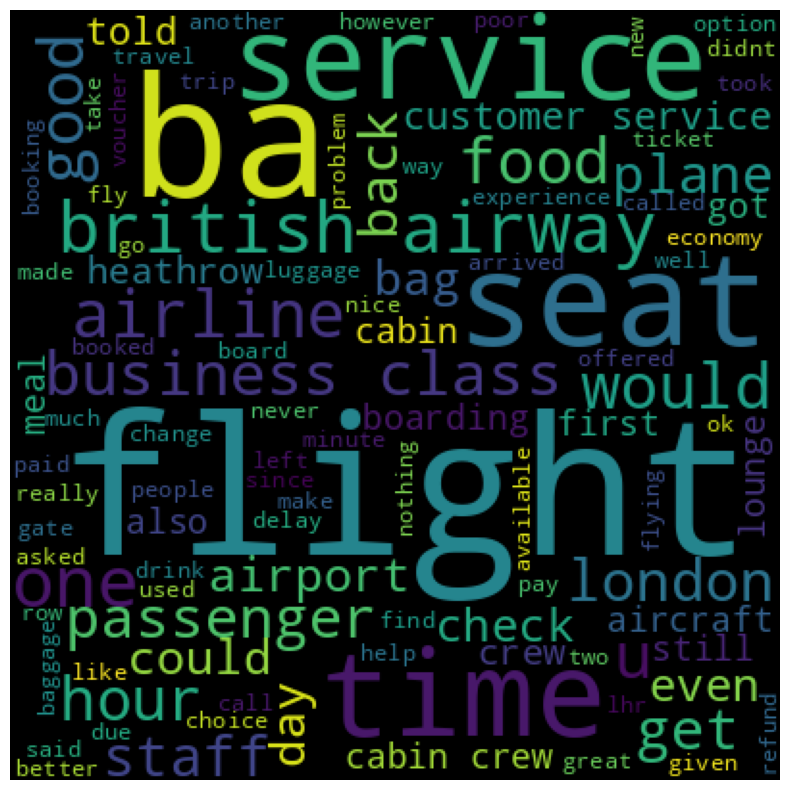

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width = 400, height = 400, 
                max_words = 500,
                stopwords = stop_words, 
                max_font_size = 100,
                min_font_size = 10).generate(' '.join(df.corpus))

plt.figure(figsize=(10, 10), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off") 


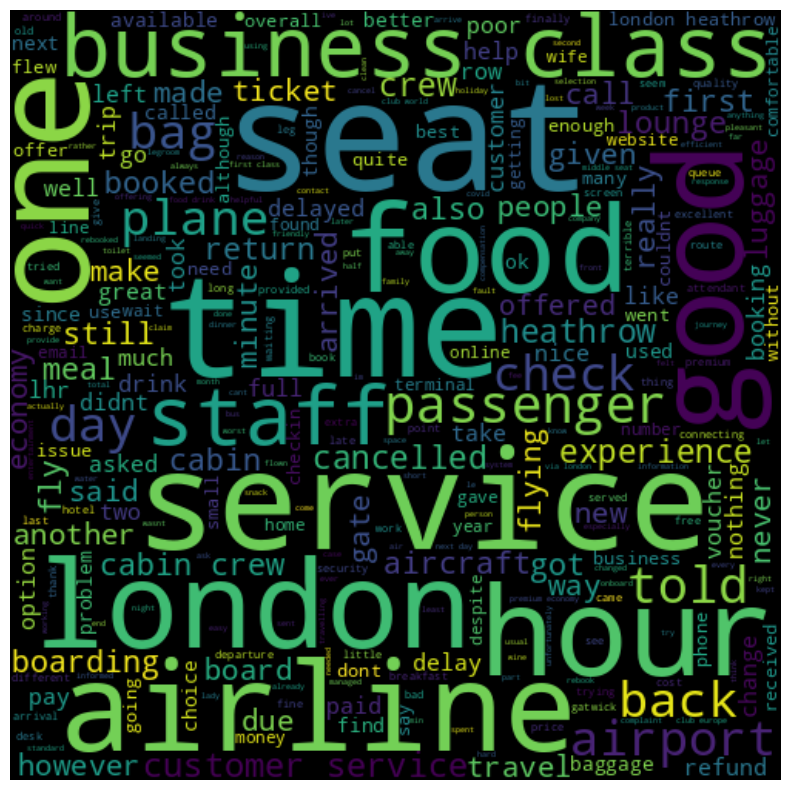

In [23]:

reviews = " ".join(df.corpus)
plt.figure(figsize=(20,10))

new_stopwords = stop_words
new_stopwords.update(["ba","flight", "british","airway", "could","even", "would","u", "get"])
# Create and generate a word cloud image:
wordcloud = WordCloud(height=500,
                      width=500,
                      max_font_size=100,
                      max_words=300, 
                      stopwords=new_stopwords
                      ).generate(reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
import nltk.collocations as collocations
from nltk import FreqDist, bigrams

reviews = " ".join(df.corpus)

#split the text of all reviews into a list of words
words = reviews.split(" ")

new_words = [word for word in words if word not in stopwords]

def get_freq_dist(new_words,number_of_ngrams ):
    from nltk import ngrams
    
    ## Generate bigrams
    ngrams = ngrams(new_words, number_of_ngrams)

    ## Creating FreqDist
    ngram_fd = FreqDist(ngrams).most_common(40)

    ## Sort values by highest frequency
    ngram_sorted = {k:v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Join bigram tokens with '_' + maintain sorting
    ngram_joined = {'_'.join(k):v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Convert to Pandas series for easy plotting
    ngram_freqdist = pd.Series(ngram_joined)
    plt.figure(figsize=(10,10))
    ax = ngram_freqdist.plot(kind="barh")
    
    return ax


get_freq_dist(new_words,4)